In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('crime_regression_data.csv', index_col=['boro', 'zipcode'])
df.head()

businesses  cafe  pawn  debt   cig  total_select_bus     hpdA  \
boro  zipcode                                                                  
Bronx 10453           447   NaN   NaN   NaN   NaN               NaN  12079.0   
      10457           470   NaN   NaN   NaN   NaN               NaN  11139.0   
      10460           313   NaN   NaN   NaN   NaN               NaN   7043.0   
      10458           535   6.0  15.0   1.0  95.0             117.0  11936.0   
      10467           604   NaN   NaN   NaN   NaN               NaN  10581.0   

                  hpdB     hpdC  hpdTotal     ...      positiveRodent  \
boro  zipcode                                 ...                       
Bronx 10453    36822.0  11188.0   60089.0     ...             23460.0   
      10457    33267.0  10221.0   54627.0     ...             30270.0   
      10460    20282.0   6783.0   34108.0     ...             15991.0   
      10458    34378.0  11569.0   57883.0     ...             28913.0   
      10467    30801.0   9495.0   50877.0     ...             12557.0   

                 total  violation  misdemeanor   felony  population  \
boro  zipcode                                                         
Bronx 10453    58579.0     7514.0      37011.0  14054.0     76775.0   
      10457    67137.0     7683.0      42228.0  17226.0     69048.0   
      10460    51550.0     5677.0      31992.0  13881.0     53707.0   
      10458    69136.0     7326.0      41794.0  20016.0     77840.0   
      10467    64178.0     8656.0      37089.0  18433.0     94342.0   

               pop_per_sq_mile   theft  assault  harassment  
boro  zipcode                                                
Bronx 10453           87970.27  5745.0   8058.0      7409.0  
      10457           58547.95  6928.0   9025.0      7631.0  
      10460           33064.79  5491.0   6581.0      5527.0  
      10458           62296.26  9093.0   8358.0      7217.0  
      10467           33219.75  7209.0   7743.0      8542.0  

[5 rows x 21 columns]

In [3]:
# Scale the dataset and compute the correlation matrix

selected_col = ['cafe', 'pawn', 'debt', 'cig', 'total_select_bus', 'total', 'violation', 'misdemeanor', 'felony']
df1 = df.drop(selected_col, axis=1).dropna()
df1_scaled = preprocessing.scale(df1)
df1_new = pd.DataFrame(data=df1_scaled, columns = df1.columns)
cor_matrix = df1_new.corr()
cor_matrix

,businesses,hpdA,hpdB,hpdC,hpdTotal,negativeRodent,positiveRodent,population,pop_per_sq_mile,theft,assault,harassment
businesses,1.000000,0.249637,0.243660,0.222829,0.241238,0.257798,0.251259,0.717633,0.149517,0.540950,0.406004,0.497740
hpdA,0.249637,1.000000,0.993999,0.985928,0.995872,0.792244,0.735341,0.535953,0.485912,0.381457,0.796271,0.706864
hpdB,0.243660,0.993999,1.000000,0.991535,0.999407,0.785346,0.713937,0.536511,0.442416,0.360400,0.823400,0.726163
hpdC,0.222829,0.985928,0.991535,1.000000,0.994399,0.774557,0.711637,0.519823,0.450715,0.350000,0.820583,0.721067
hpdTotal,0.241238,0.995872,0.999407,0.994399,1.000000,0.786372,0.719403,0.534288,0.453802,0.363356,0.819307,0.722954
negativeRodent,0.257798,0.792244,0.785346,0.774557,0.786372,1.000000,0.854937,0.439419,0.348332,0.405502,0.725117,0.673309
positiveRodent,0.251259,0.735341,0.713937,0.711637,0.719403,0.854937,1.000000,0.400619,0.537741,0.502548,0.658678,0.595467
population,0.717633,0.535953,0.536511,0.519823,0.534288,0.439419,0.400619,1.000000,0.378728,0.488881,0.599266,0.650538
pop_per_sq_mile,0.149517,0.485912,0.442416,0.450715,0.453802,0.348332,0.537741,0.378728,1.000000,0.373091,0.292843,0.239671
theft,0.540950,0.381457,0.360400,0.350000,0.363356,0.405502,0.502548,0.488881,0.373091,1.000000,0.556068,0.635279


In [4]:
cols = ['hpdA', 'hpdB', 'hpdC', 'negativeRodent', 'population', 'pop_per_sq_mile', 'theft', 'assault', 'harassment']
df_scatterplot = df1.drop(cols, axis=1)
df_scatterplot.head()

businesses  hpdTotal  positiveRodent
boro  zipcode                                      
Bronx 10453           447   60089.0         23460.0
      10457           470   54627.0         30270.0
      10460           313   34108.0         15991.0
      10458           535   57883.0         28913.0
      10467           604   50877.0         12557.0

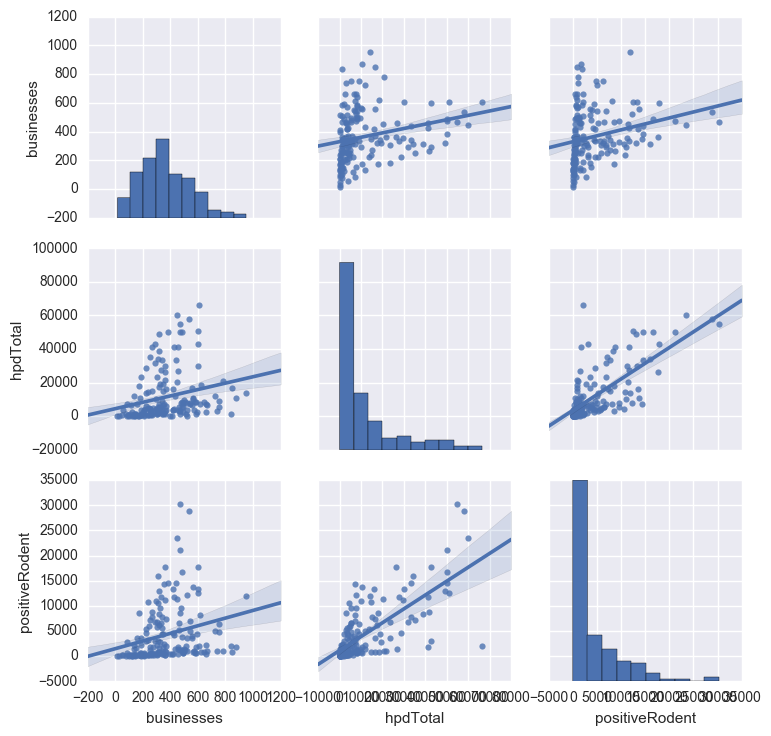

In [5]:
sns.set()
sns.pairplot(df_scatterplot, kind='reg', diag_kind='hist')
plt.show()

In [6]:
df1_new.head()

,businesses,hpdA,hpdB,hpdC,hpdTotal,negativeRodent,positiveRodent,population,pop_per_sq_mile,theft,assault,harassment
0,0.441781,3.333934,3.409455,3.060797,3.332254,2.980019,3.422257,1.144432,1.827576,0.369129,2.011236,1.694863
1,0.566079,3.012517,3.005308,2.731167,2.958675,5.426111,4.636392,0.837707,0.717757,0.741841,2.399995,1.792188
2,-0.282388,1.611958,1.529121,1.559227,1.555258,1.884855,2.090631,0.228740,-0.243476,0.289105,1.417443,0.869796
3,0.917355,3.285038,3.131611,3.190671,3.181373,4.579447,4.394456,1.186708,0.859144,1.423940,2.131844,1.610690
4,1.290248,2.821718,2.724963,2.483690,2.702190,2.516222,1.478394,1.841761,-0.237631,0.830372,1.884597,2.191569


In [7]:
# Get summary statistics

basic_summary = df.groupby(level='boro').describe()
basic_summary = basic_summary.applymap('{:.2f}'.format)
basic_summary

/Users/user/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


businesses   cafe   pawn   debt     cig total_select_bus  \
boro                                                                          
Bronx        count      25.00   8.00   8.00   8.00    8.00             8.00   
             mean      348.60   3.12   4.75   0.38   57.12            65.38   
             std       153.29   2.03   4.89   0.52   31.12            36.25   
             min        46.00   1.00   0.00   0.00    4.00             5.00   
             25%       238.00    nan    nan    nan     nan              nan   
             50%       345.00    nan    nan    nan     nan              nan   
             75%       471.00    nan    nan    nan     nan              nan   
             max       604.00   6.00  15.00   1.00   95.00           117.00   
Brooklyn     count      37.00  24.00  24.00  24.00   24.00            24.00   
             mean      470.54   6.50   1.12   0.50   62.71            70.83   
             std       188.89   7.58   1.15   0.78   17.40            21.88   
             min        52.00   1.00   0.00   0.00   27.00            30.00   
             25%       322.00    nan    nan    nan     nan              nan   
             50%       432.00    nan    nan    nan     nan              nan   
             75%       604.00    nan    nan    nan     nan              nan   
             max       874.00  32.00   3.00   3.00  108.00           141.00   
Manhattan    count      43.00  37.00  37.00  37.00   37.00            37.00   
             mean      298.30  25.68   2.49   1.11   51.22            80.49   
             std       166.99  24.68   5.61   1.47   21.96            37.37   
             min        17.00   1.00   0.00   0.00    8.00            13.00   
             25%       186.50    nan    nan    nan     nan              nan   
             50%       300.00    nan    nan    nan     nan              nan   
             75%       390.00    nan    nan    nan     nan              nan   
             max       752.00  94.00  32.00   5.00  104.00           165.00   
Queens       count      58.00  15.00  15.00  15.00   15.00            15.00   
             mean      306.53   7.80   1.60   0.40   51.47            61.27   
             std       194.61   8.78   1.80   0.63   25.97            27.55   
             min        20.00   1.00   0.00   0.00   22.00            23.00   
             25%       158.00    nan    nan    nan     nan              nan   
             50%       253.50    nan    nan    nan     nan              nan   
             75%       427.25    nan    nan    nan     nan              nan   
             max       952.00  28.00   6.00   2.00  113.00           115.00   
StatenIsland count      12.00   0.00   0.00   0.00    0.00             0.00   
             mean      396.17    nan    nan    nan     nan              nan   
             std       189.47    nan    nan    nan     nan              nan   
             min       166.00    nan    nan    nan     nan              nan   
             25%       259.00    nan    nan    nan     nan              nan   
             50%       343.00    nan    nan    nan     nan              nan   
             75%       513.50    nan    nan    nan     nan              nan   
             max       837.00    nan    nan    nan     nan              nan   

                        hpdA      hpdB      hpdC  hpdTotal    ...      \
boro                                                          ...       
Bronx        count     25.00     25.00     25.00     25.00    ...       
             mean    5089.88  14920.80   4735.88  24746.56    ...       
             std     4235.99  12495.12   3890.83  20602.62    ...       
             min       84.00    165.00     61.00    310.00    ...       
             25%     1468.00   4427.00   1410.00   7470.00    ...       
             50%     4071.00  11432.00   3480.00  18983.00    ...       
             75%    10230.00  29645.00   8604.00  49892.00    ...       
             max    12079.00  36822.00  115

## By Population

In [8]:
selected_cols = ['businesses', 'hpdTotal', 'positiveRodent', 'negativeRodent',\
                'population', 'violation', 'misdemeanor', 'felony', 'total', 'theft',\
                'assault', 'harassment', 'pop_per_sq_mile']
df3 = df[selected_cols].dropna()
cols = ['businesses', 'hpdTotal', 'positiveRodent', 'negativeRodent', 'felony', 'misdemeanor', 'violation', 
       'total']

for col in cols: 
    df3[col] = df3[col] / df3['population']
df3.head()

businesses  hpdTotal  positiveRodent  negativeRodent  \
boro  zipcode                                                         
Bronx 10453      0.005822  0.782664        0.305568        0.096099   
      10457      0.006807  0.791145        0.438391        0.175139   
      10460      0.005828  0.635076        0.297745        0.098069   
      10458      0.006873  0.743615        0.371441        0.134391   
      10467      0.006402  0.539283        0.133101        0.068729   

               population  violation  misdemeanor    felony     total   theft  \
boro  zipcode                                                                   
Bronx 10453       76775.0   0.097870     0.482071  0.183054  0.762996  5745.0   
      10457       69048.0   0.111270     0.611575  0.249479  0.972324  6928.0   
      10460       53707.0   0.105703     0.595677  0.258458  0.959838  5491.0   
      10458       77840.0   0.094116     0.536922  0.257143  0.888181  9093.0   
      10467       94342.0   0.091751     0.393133  0.195385  0.680270  7209.0   

               assault  harassment  pop_per_sq_mile  
boro  zipcode                                        
Bronx 10453     8058.0      7409.0         87970.27  
      10457     9025.0      7631.0         58547.95  
      10460     6581.0      5527.0         33064.79  
      10458     8358.0      7217.0         62296.26  
      10467     7743.0      8542.0         33219.75

In [9]:
# Normalize data
Y = ['total']
df3_new = pd.DataFrame(np.c_[preprocessing.scale(df3.drop(Y, 1)), df3[Y]], index=df3.index, columns = df3.columns)
df3_new.head()

businesses  hpdTotal  positiveRodent  negativeRodent  \
boro  zipcode                                                         
Bronx 10453     -0.382933  2.647876        1.931112        2.082262   
      10457     -0.274087  2.686942        3.132514        4.711441   
      10460     -0.382301  1.968089        1.860351        2.147797   
      10458     -0.266768  2.468020        2.526946        3.356005   
      10467     -0.318815  1.526870        0.371114        1.171819   

               population  violation  misdemeanor    felony     total  \
boro  zipcode                                                           
Bronx 10453      1.144432   0.229534     0.253360 -0.153248  0.369129   
      10457      0.837707   0.451681     0.619583  0.148805  0.741841   
      10460      0.228740   0.359386     0.574625  0.189637  0.289105   
      10458      1.186708   0.167295     0.408473  0.183656  1.423940   
      10467      1.841761   0.128090     0.001854 -0.097177  0.830372   

                  theft   assault  harassment  pop_per_sq_mile  
boro  zipcode                                                   
Bronx 10453    2.011236  1.694863    1.827576         0.762996  
      10457    2.399995  1.792188    0.717757         0.972324  
      10460    1.417443  0.869796   -0.243476         0.959838  
      10458    2.131844  1.610690    0.859144         0.888181  
      10467    1.884597  2.191569   -0.237631         0.680270

In [10]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [11]:
model = ols("total ~ businesses + hpdTotal + positiveRodent + negativeRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     8.119
Date:                Fri, 05 May 2017   Prob (F-statistic):           5.47e-06
Time:                        00:27:09   Log-Likelihood:                -220.29
No. Observations:                 166   AIC:                             450.6
Df Residuals:                     161   BIC:                             466.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       7.633e-17      0.072   1.06e

In [12]:
model = ols("total ~ businesses + hpdTotal + positiveRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     10.84
Date:                Fri, 05 May 2017   Prob (F-statistic):           1.58e-06
Time:                        00:27:09   Log-Likelihood:                -220.36
No. Observations:                 166   AIC:                             448.7
Df Residuals:                     162   BIC:                             461.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       7.633e-17      0.072   1.06e

In [13]:
model = ols("felony ~ businesses + hpdTotal + positiveRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 felony   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     264.1
Date:                Fri, 05 May 2017   Prob (F-statistic):           3.85e-62
Time:                        00:27:09   Log-Likelihood:                -88.354
No. Observations:                 166   AIC:                             184.7
Df Residuals:                     162   BIC:                             197.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       1.388e-17      0.032   4.29e

In [14]:
model = ols("misdemeanor ~ businesses + hpdTotal + positiveRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            misdemeanor   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     231.1
Date:                Fri, 05 May 2017   Prob (F-statistic):           2.68e-58
Time:                        00:27:09   Log-Likelihood:                -97.431
No. Observations:                 166   AIC:                             202.9
Df Residuals:                     162   BIC:                             215.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept      -9.714e-17      0.034  -2.84e

In [15]:
model = ols("violation ~ businesses + hpdTotal + positiveRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              violation   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     86.04
Date:                Fri, 05 May 2017   Prob (F-statistic):           2.41e-33
Time:                        00:27:09   Log-Likelihood:                -156.45
No. Observations:                 166   AIC:                             320.9
Df Residuals:                     162   BIC:                             333.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept      -8.327e-17      0.049  -1.71e

In [16]:
model = ols("theft ~ businesses + hpdTotal + positiveRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  theft   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     51.81
Date:                Fri, 05 May 2017   Prob (F-statistic):           1.56e-23
Time:                        00:27:09   Log-Likelihood:                -179.71
No. Observations:                 166   AIC:                             367.4
Df Residuals:                     162   BIC:                             379.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept      -6.245e-17      0.056  -1.11e

In [17]:
model = ols("assault ~ businesses + hpdTotal + positiveRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                assault   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     31.06
Date:                Fri, 05 May 2017   Prob (F-statistic):           6.45e-16
Time:                        00:27:10   Log-Likelihood:                -197.83
No. Observations:                 166   AIC:                             403.7
Df Residuals:                     162   BIC:                             416.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept      -4.857e-17      0.063  -7.76e

In [18]:
model = ols("harassment ~ businesses + hpdTotal + positiveRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             harassment   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     26.98
Date:                Fri, 05 May 2017   Prob (F-statistic):           3.33e-14
Time:                        00:27:10   Log-Likelihood:                -201.92
No. Observations:                 166   AIC:                             411.8
Df Residuals:                     162   BIC:                             424.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       1.492e-16      0.064   2.33e

## By Area

In [19]:
df4 = df[selected_cols].dropna()
cols = ['businesses', 'hpdTotal', 'positiveRodent', 'negativeRodent', 'felony', 'misdemeanor', 'violation', 
       'total']

df4['area'] = df4['population'] / df4['pop_per_sq_mile']
                                      
for col in cols: 
    df4[col] = df4[col] / df4['area']
df4.head()

businesses      hpdTotal  positiveRodent  negativeRodent  \
boro  zipcode                                                             
Bronx 10453    512.181188  68851.130629    26880.918713     8453.854146   
      10457    398.527640  46319.934895    25666.875891    10254.031389   
      10460    192.698890  20998.638116     9844.881615     3242.635949   
      10458    428.166741  46324.440103    23139.411169     8372.060327   
      10467    212.680768  17914.833486     4421.576824     2283.149170   

               population    violation   misdemeanor        felony  \
boro  zipcode                                                        
Bronx 10453       76775.0  8609.685559  42407.914855  16103.343205   
      10457       69048.0  6514.655020  35806.436575  14606.461979   
      10460       53707.0  3495.053025  19695.919744   8545.857151   
      10458       77840.0  5863.083257  33448.225725  16019.038286   
      10467       94342.0  3047.954845  13059.796355   6490.636745   

                      total   theft  assault  harassment  pop_per_sq_mile  \
boro  zipcode                                                               
Bronx 10453    67120.943619  5745.0   8058.0      7409.0         87970.27   
      10457    56927.553574  6928.0   9025.0      7631.0         58547.95   
      10460    31736.829920  5491.0   6581.0      5527.0         33064.79   
      10458    55330.347268  9093.0   8358.0      7217.0         62296.26   
      10467    22598.387945  7209.0   7743.0      8542.0         33219.75   

                   area  
boro  zipcode            
Bronx 10453    0.872738  
      10457    1.179341  
      10460    1.624296  
      10458    1.249513  
      10467    2.839937

In [20]:
# Normalize data
Y = ['total']
df4_new = pd.DataFrame(np.c_[preprocessing.scale(df4.drop(Y, 1)), df4[Y]], index=df4.index, columns = df4.columns)
df4_new.head()

businesses  hpdTotal  positiveRodent  negativeRodent  \
boro  zipcode                                                         
Bronx 10453      0.806210  3.789801        3.376695        3.733041   
      10457      0.341061  2.322024        3.192006        4.695456   
      10460     -0.501334  0.672488        0.785045        0.947008   
      10458      0.462365  2.322317        2.807509        3.689312   
      10467     -0.419554  0.471596       -0.039989        0.434045   

               population  violation  misdemeanor    felony     total  \
boro  zipcode                                                           
Bronx 10453      1.144432   2.156649     1.948153  1.082173  0.369129   
      10457      0.837707   1.337875     1.476794  0.877439  0.741841   
      10460      0.228740   0.157763     0.326471  0.048510  0.289105   
      10458      1.186708   1.083230     1.308413  1.070642  1.423940   
      10467      1.841761  -0.016970    -0.147362 -0.232589  0.830372   

                  theft   assault  harassment  pop_per_sq_mile          area  
boro  zipcode                                                                 
Bronx 10453    2.011236  1.694863    1.827576        -0.530820  67120.943619  
      10457    2.399995  1.792188    0.717757        -0.346988  56927.553574  
      10460    1.417443  0.869796   -0.243476        -0.080204  31736.829920  
      10458    2.131844  1.610690    0.859144        -0.304915  55330.347268  
      10467    1.884597  2.191569   -0.237631         0.648667  22598.387945

In [21]:
model = ols("total ~ businesses + hpdTotal + positiveRodent + negativeRodent", df4_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     12.40
Date:                Fri, 05 May 2017   Prob (F-statistic):           8.20e-09
Time:                        00:27:10   Log-Likelihood:                -213.26
No. Observations:                 166   AIC:                             436.5
Df Residuals:                     161   BIC:                             452.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       7.633e-17      0.069   1.11e

In [29]:
model = ols("total ~ businesses + hpdTotal + negativeRodent", df4_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     16.58
Date:                Fri, 05 May 2017   Prob (F-statistic):           1.92e-09
Time:                        00:29:58   Log-Likelihood:                -213.32
No. Observations:                 166   AIC:                             434.6
Df Residuals:                     162   BIC:                             447.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       7.633e-17      0.069   1.11e

In [30]:
model = ols("felony ~ businesses + hpdTotal + negativeRodent", df4_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 felony   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     200.1
Date:                Fri, 05 May 2017   Prob (F-statistic):           2.97e-54
Time:                        00:31:09   Log-Likelihood:                -106.99
No. Observations:                 166   AIC:                             222.0
Df Residuals:                     162   BIC:                             234.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        1.18e-16      0.036   3.26e

In [31]:
model = ols("misdemeanor ~ businesses + hpdTotal + negativeRodent", df4_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            misdemeanor   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     178.6
Date:                Fri, 05 May 2017   Prob (F-statistic):           3.86e-51
Time:                        00:31:17   Log-Likelihood:                -114.35
No. Observations:                 166   AIC:                             236.7
Df Residuals:                     162   BIC:                             249.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       1.318e-16      0.038   3.48e

In [32]:
model = ols("violation ~ businesses + hpdTotal + negativeRodent", df4_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              violation   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     146.9
Date:                Fri, 05 May 2017   Prob (F-statistic):           5.23e-46
Time:                        00:31:23   Log-Likelihood:                -126.48
No. Observations:                 166   AIC:                             261.0
Df Residuals:                     162   BIC:                             273.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept      -1.284e-16      0.041  -3.15e

In [35]:
model = ols("theft ~ businesses + hpdTotal + negativeRodent", df4_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  theft   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     32.43
Date:                Fri, 05 May 2017   Prob (F-statistic):           1.80e-16
Time:                        00:31:43   Log-Likelihood:                -196.51
No. Observations:                 166   AIC:                             401.0
Df Residuals:                     162   BIC:                             413.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept      -6.245e-17      0.062  -1.01e

In [33]:
model = ols("assault ~ businesses + hpdTotal + negativeRodent", df4_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                assault   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     21.56
Date:                Fri, 05 May 2017   Prob (F-statistic):           8.44e-12
Time:                        00:31:30   Log-Likelihood:                -207.66
No. Observations:                 166   AIC:                             423.3
Df Residuals:                     162   BIC:                             435.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept      -4.857e-17      0.066  -7.31e

In [34]:
model = ols("harassment ~ businesses + hpdTotal + negativeRodent", df4_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             harassment   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     94.85
Date:                Fri, 05 May 2017   Prob (F-statistic):           1.75e-35
Time:                        00:31:36   Log-Likelihood:                -151.38
No. Observations:                 166   AIC:                             310.8
Df Residuals:                     162   BIC:                             323.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       1.492e-16      0.047   3.15e